In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [0]:
%matplotlib notebook
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [0]:
input_shape

(28, 28, 1)

<H1>3 layer ConvNet </H1>

In [9]:
#conv-maxpool-conv-maxpool-conv-maxpool-flatten-fc-softmax

model = Sequential()
#first layer of conv
model.add(Conv2D(128, (3,3), activation= 'relu', input_shape= input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))

#second layer of conv
model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#third layer of conv
model.add(Conv2D(32, (3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy, optimizer= keras.optimizers.Adadelta(), metrics = ['accuracy'])

m1= model.fit(x_train , y_train,
         batch_size = batch_size,
         epochs = epochs,
         verbose= 1,
         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 161s 3ms/step - loss: 0.7390 - acc: 0.7576 - val_loss: 0.1568 - val_acc: 0.9517
Epoch 2/12
60000/60000 [==============================] - 160s 3ms/step - loss: 0.2909 - acc: 0.9155 - val_loss: 0.1165 - val_acc: 0.9656
Epoch 3/12
60000/60000 [==============================] - 161s 3ms/step - loss: 0.2331 - acc: 0.9333 - val_loss: 0.0911 - val_acc: 0.9731
Epoch 4/12
60000/60000 [==============================] - 159s 3ms/step - loss: 0.2009 - acc: 0.9429 - val_loss: 0.0717 - val_acc: 0.9791
Epoch 5/12
60000/60000 [==============================] - 159s 3ms/step - loss: 0.1799 - acc: 0.9482 - val_loss: 0.0737 - val_acc: 0.9788
Epoch 6/12
60000/60000 [==============================] - 158s 3ms/step - loss: 0.1676 - acc: 0.9523 - val_loss: 0.0703 - val_acc: 0.9801
Epoch 7/12
60000/60000 [==============================] - 159s 3ms/step - loss: 0.1528 - acc: 0.9561 - val_loss: 0.0677 - 

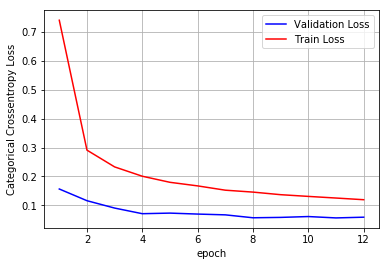

In [21]:
fig, ax = plt.subplots(1,1)

ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x= list(range(1,epochs +1))

train_loss = m1.history['loss']
validation_loss = m1.history['val_loss']

plt_dynamic(x,validation_loss,train_loss,ax)

<h1> 5-layer Conv </h1>


In [0]:
from keras.layers.normalization import BatchNormalization
from keras.initializers import he_normal


In [23]:
# conv-conv- maxpool-conv-conv-conv-maxpool-flatten-FC-BN-softmax

model = Sequential()
#first layer of conv
model.add(Conv2D(64, (5,5),strides =(2,2),padding= 'same', activation= 'relu', input_shape= input_shape))  #kernel_size= (5,5) and strides = (2,2)
model.add(Dropout(0.25))
#second layer of conv
model.add(Conv2D(64, (5,5), strides =(2,2),padding= 'same', activation= 'relu'))#kernel_size= (5,5) and strides = (2,2)
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))

#third layer of conv
model.add(Conv2D(128, (3,3),padding= 'same', activation= 'relu'))#kernel_size= (3,3)
model.add(Dropout(0.25))

#fourth layer of conv
model.add(Conv2D(128, (3,3),padding= 'same', activation= 'relu'))#kernel_size= (3,3)
model.add(Dropout(0.25))

#fifth layer of conv
model.add(Conv2D(128, (3,3),padding= 'same', activation= 'relu'))#kernel_size= (3,3)
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation = 'relu',kernel_initializer = he_normal(seed= None))) 
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy, optimizer= keras.optimizers.Adam(), metrics = ['accuracy'])  #using Adam optimizer

m2 = model.fit(x_train , y_train,
         batch_size = batch_size,
         epochs = epochs,
         verbose= 1,
         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 154s 3ms/step - loss: 2.4399 - acc: 0.1910 - val_loss: 3.0387 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 156s 3ms/step - loss: 0.8663 - acc: 0.6937 - val_loss: 0.2178 - val_acc: 0.9474
Epoch 3/12
60000/60000 [==============================] - 155s 3ms/step - loss: 0.2590 - acc: 0.9285 - val_loss: 0.0812 - val_acc: 0.9746
Epoch 4/12
60000/60000 [==============================] - 154s 3ms/step - loss: 0.1817 - acc: 0.9514 - val_loss: 0.0676 - val_acc: 0.9810
Epoch 5/12
60000/60000 [==============================] - 153s 3ms/step - loss: 0.1516 - acc: 0.9591 - val_loss: 0.0495 - val_acc: 0.9852
Epoch 6/12
60000/60000 [==============================] - 153s 3ms/step - loss: 0.1338 - acc: 0.9647 - val_loss: 0.0473 - val_acc: 0.9858
Epoch 7/12
60000/60000 [==============================] - 152s 3ms/step - loss: 0.1169 - acc: 0.9686 - val_loss: 0.0380 - 

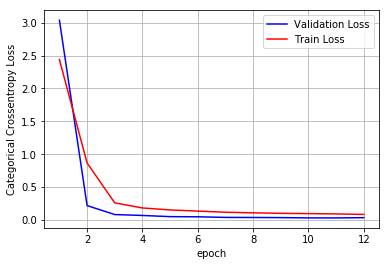

In [24]:
fig, ax = plt.subplots(1,1)

ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x= list(range(1,epochs +1))

train_loss = m2.history['loss']
validation_loss = m2.history['val_loss']

plt_dynamic(x,validation_loss,train_loss,ax)

<h1> 7-layer- Conv</h1>

In [25]:
#conv-conv-maxpool-conv-conv-maxpool-BN-conv-conv-conv-maxpool-BN-flatten-fc-softmax

model = Sequential()
#first layer of conv
model.add(Conv2D(32, (7,7), padding= 'same', activation= 'relu', input_shape= input_shape))  #kernel_size= (7,7) 

#second layer of conv
model.add(Conv2D(32, (7,7),padding= 'same', activation= 'relu'))#kernel_size= (5,5) 
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))

#third layer of conv
model.add(Conv2D(128, (5,5),strides =(2,2),padding= 'same', activation= 'relu'))  #kernel_size= (5,5) and strides = (2,2)

#fourth layer of conv
model.add(Conv2D(128, (5,5), strides =(2,2),padding= 'same', activation= 'relu'))#kernel_size= (5,5) and strides = (2,2)
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#fifth layer of conv
model.add(Conv2D(64, (3,3),padding= 'same', activation= 'relu'))#kernel_size= (3,3)
model.add(Dropout(0.25))

#sixth layer of conv
model.add(Conv2D(64, (3,3),padding= 'same', activation= 'relu'))#kernel_size= (3,3)
model.add(Dropout(0.25))

#seventh layer of conv
model.add(Conv2D(64, (3,3),padding= 'same', activation= 'relu'))#kernel_size= (3,3)
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation = 'relu',kernel_initializer = he_normal(seed= None))) 
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy, optimizer= keras.optimizers.Adam(), metrics = ['accuracy'])  #using Adam optimizer

m3 = model.fit(x_train , y_train,
         batch_size = batch_size,
         epochs = epochs,
         verbose= 1,
         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 760s 13ms/step - loss: 1.8664 - acc: 0.4218 - val_loss: 0.4580 - val_acc: 0.8502
Epoch 2/12
60000/60000 [==============================] - 763s 13ms/step - loss: 0.4450 - acc: 0.8658 - val_loss: 0.1234 - val_acc: 0.9631
Epoch 3/12
60000/60000 [==============================] - 765s 13ms/step - loss: 0.2188 - acc: 0.9404 - val_loss: 0.0808 - val_acc: 0.9768
Epoch 4/12
60000/60000 [==============================] - 770s 13ms/step - loss: 0.1598 - acc: 0.9587 - val_loss: 0.0588 - val_acc: 0.9825
Epoch 5/12
60000/60000 [==============================] - 772s 13ms/step - loss: 0.1267 - acc: 0.9672 - val_loss: 0.0594 - val_acc: 0.9832
Epoch 6/12
60000/60000 [==============================] - 767s 13ms/step - loss: 0.1114 - acc: 0.9713 - val_loss: 0.0412 - val_acc: 0.9883
Epoch 7/12
60000/60000 [==============================] - 768s 13ms/step - loss: 0.0986 - acc: 0.9758 - val_loss: 0

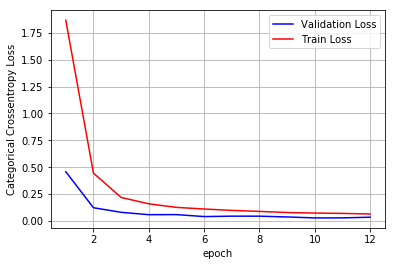

In [26]:
fig, ax = plt.subplots(1,1)

ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x= list(range(1,epochs +1))

train_loss = m3.history['loss']
validation_loss = m3.history['val_loss']

plt_dynamic(x,validation_loss,train_loss,ax)

In [0]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ['Model', 'Test Score/Loss', 'Test Accuracy']

x.add_row(['Model 1 - 3 layer', '0.059','98.4%'])
x.add_row(['Model 2 - 5 layer','0.033','99.01%'])
x.add_row(['Model 3 - 7 layer', '0.035','99.05%'])

In [29]:
print(x)

+-------------------+-----------------+---------------+
|       Model       | Test Score/Loss | Test Accuracy |
+-------------------+-----------------+---------------+
| Model 1 - 3 layer |      0.059      |     98.4%     |
| Model 2 - 5 layer |      0.033      |     99.01%    |
| Model 3 - 7 layer |      0.035      |     99.05%    |
+-------------------+-----------------+---------------+
